In [47]:
import os
import sys

# Import scikit-learn
import sklearn

# Import tensorflow
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np

# Set seed to make output's stable across runs
np.random.seed(42)




### Perceptron on Iris Dataset

In [48]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, (2, 3)] # petal length and petal width
y = (iris.target == 0).astype(np.int)

In [49]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(tol=1e-3, random_state=42, max_iter=1000)

per_clf.fit(X, y)

Perceptron(random_state=42)

In [50]:
y_pred = per_clf.predict([[2, 0.5]])

In [51]:
y_pred

array([1])

In [52]:
per_clf.coef_

array([[-1.4, -2.2]])

In [53]:
per_clf.intercept_

array([4.])

Image Classifier

In [54]:
fasion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fasion_mnist.load_data()

In [55]:
X_train_full.shape

(60000, 28, 28)

In [56]:
y_train_full.shape

(60000,)

In [57]:
X_train_full.dtype

dtype('uint8')

In [58]:
X_train, y_train = X_train_full[:50000] / 255., y_train_full[0:50000]

In [59]:
X_valid, y_valid = X_train[50000:] / 255., y_train_full[50000:]

In [60]:
X_test / 255.

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

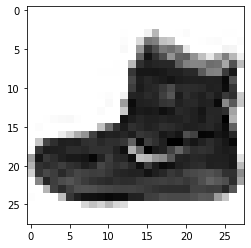

In [61]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")

In [62]:
y_train[0]

9

In [63]:
classes = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal",
           "shirt", "sneaker", "bag", "ankle-boot"]

In [64]:
clf = keras.models.Sequential()
clf.add(keras.layers.Flatten(input_shape=(28, 28)))
clf.add(keras.layers.Dense(300, activation=keras.activations.relu))
clf.add(keras.layers.Dense(100, activation=keras.activations.relu))
clf.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [65]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [66]:
clf.layers

In [67]:
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [85]:
keras.utils.plot_model(clf, show_shapes=True, show_dtype=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [69]:
clf.layers[1].get_weights()

[array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
          0.03859074, -0.06889391],
        [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
         -0.02763776, -0.04165364],
        [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
          0.07121518, -0.07331658],
        ...,
        [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
          0.00228987,  0.05581069],
        [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
          0.00034875,  0.02878492],
        [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
          0.00272203, -0.06793761]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [70]:
weights, biases = clf.layers[1].get_weights()

In [71]:
weights.shape

(784, 300)

In [72]:
biases.shape

(300,)

In [73]:
clf.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.sparse_categorical_crossentropy, metrics=[keras.metrics.categorical_accuracy])

In [82]:
y_train_full.shape

(60000,)

In [83]:


history = clf.fit(X_train_full, y_train_full, epochs=30 , validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1905904.8750 - categorical_accuracy: 0.0012 - val_loss: 3565.5254 - val_categorical_accuracy: 0.0000e+00